In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
features = [
    "Target",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280/OD315_of_diluted_wines",
    "Proline"
]

In [125]:
# reading the data file 
df = pd.read_csv("UCIWineDataset/wine.data")
df.columns = features
df.head()

,Target,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [126]:
# Just a Minimal EDA
df.info()
df.describe()
df.isna().values.any() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic_acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity_of_ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total_phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid_phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color_intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315_of_diluted_wines  177 non-null    float64
 13  Proli

np.False_

Text(0.5, 1.0, 'Production of Wine asper Regions in Italy')

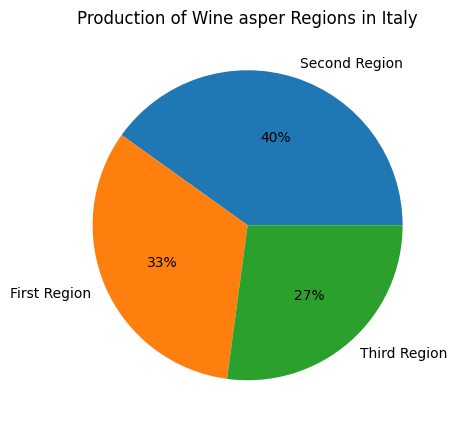

In [127]:
# Let's try to explore the relations btw data
values = df['Target'].value_counts()
plt.figure(figsize=(5,10))
plt.pie(x=values, labels=['Second Region', 'First Region', 'Third Region'], autopct='%1.f%%')
plt.title("Production of Wine asper Regions in Italy")

In [128]:
average_alcohol_region = df.groupby('Target')['Alcohol'].mean().reset_index().rename(columns={0:"Count", "Target":"Region"})
average_alcohol_region['Region_Name'] = average_alcohol_region['Region'].map({1:'First Region', 2:'Second Region', 3:'Third Region'})
average_alcohol_region

,Region,Alcohol,Region_Name
0,1,13.736379,First Region
1,2,12.278732,Second Region
2,3,13.153750,Third Region


Text(0.5, 0, 'Regions in Italy')

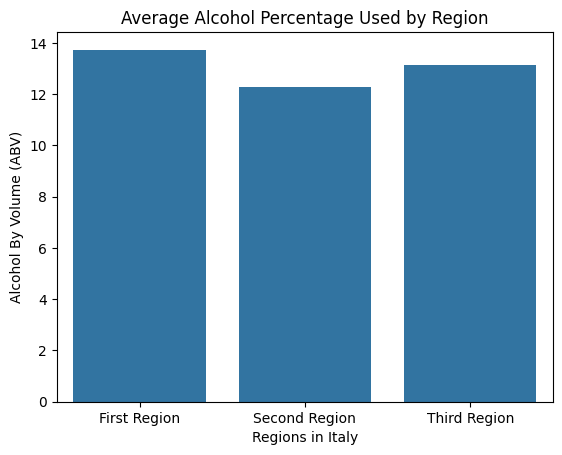

In [129]:
sns.barplot(data=average_alcohol_region, x='Region_Name', y='Alcohol')
plt.title("Average Alcohol Percentage Used by Region")
plt.ylabel("Alcohol By Volume (ABV)")
plt.xlabel("Regions in Italy")

C:\Users\Asus\AppData\Local\Temp\ipykernel_337884\2997823591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y='Proline', data=df, palette='Set2', inner=None)


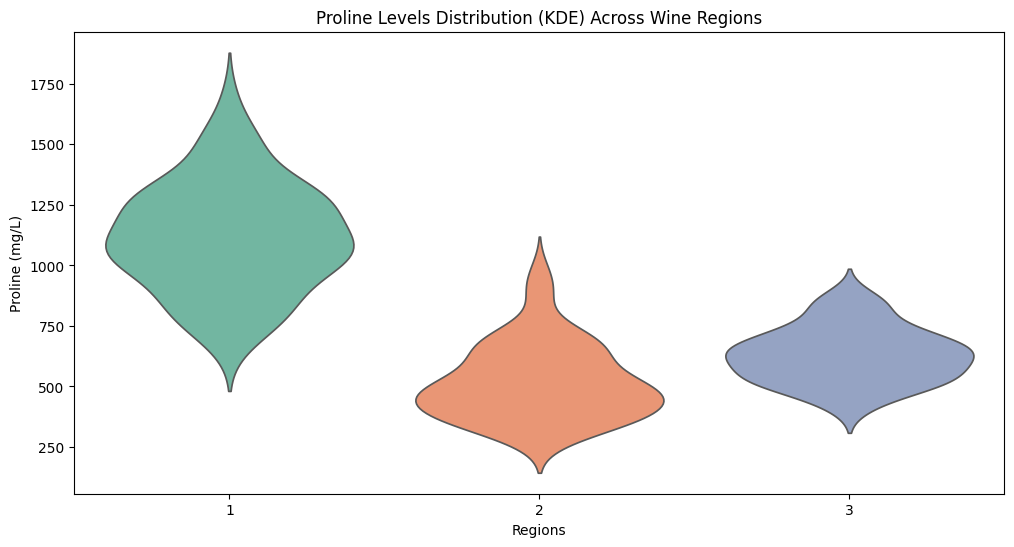

In [130]:
# ViolinPlot -> New Exploration!
plt.figure(figsize=(12, 6))
sns.violinplot(x='Target', y='Proline', data=df, palette='Set2', inner=None)
plt.title('Proline Levels Distribution (KDE) Across Wine Regions')
plt.ylabel("Proline (mg/L)")
plt.xlabel("Regions")
plt.show()

In [131]:
# Common Observations:
# The majority of wines from region-1 have proline levels are concerntrated in range of (1000-1500) mg/L
# The majority of wines from region-2 have proline levels are concerntrated in range of (200-750) mg/L
# The majority of wines from region-3 have proline levels are concerntrated in range of (500-700) mg/L

In [132]:
# let's head staright towards data transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
data_pipeline = Pipeline([
    ("scaling", StandardScaler()),
    ("dimensionReduction", PCA(n_components=2))
])

In [133]:
# independent and dependent features
x = df.drop('Target', axis=1)
y = df['Target']

In [134]:
x_transformed = data_pipeline.fit_transform(x)

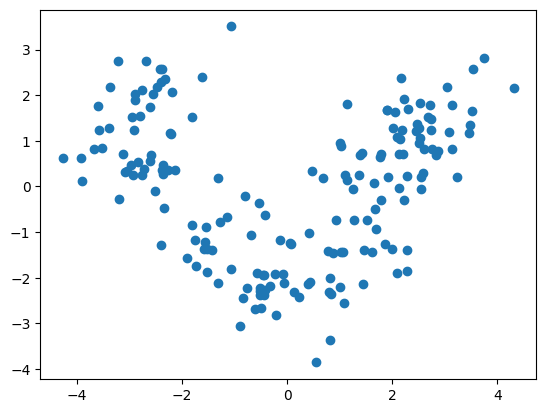

In [135]:
# plotting the data
plt.scatter(x_transformed[:,0], x_transformed[:,1])

In [136]:
# using isolation Forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination='auto')
iforest.fit(x_transformed)

,n_estimators,100
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [137]:
prediction = iforest.predict(x_transformed)
index = np.where(prediction < 0)
index

(array([  2,   4,   9,  12,  13,  15,  17,  44,  49,  51,  58,  62,  65,
         79,  96,  97,  98, 114, 115, 117, 135, 136, 145, 146, 151, 154,
        157, 158, 165, 169, 170, 172, 174, 176]),)

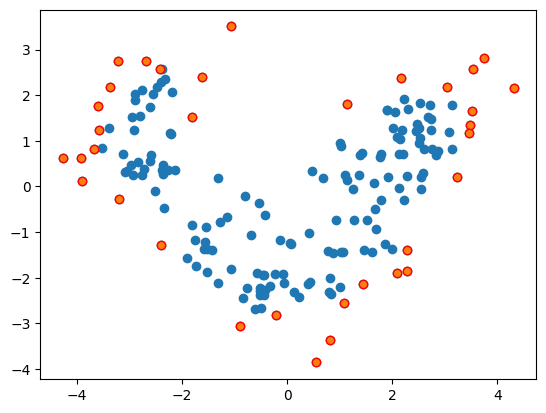

In [138]:
plt.scatter(x_transformed[:,0], x_transformed[:,1])
plt.scatter(x_transformed[index,0], x_transformed[index,1], edgecolors="r")

In [139]:
# let's try another method using -- DBScan Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)

In [140]:
dbscan.fit(x_transformed)
dbscan_labels = dbscan.labels_
dbscan_labels

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  1,  1, -1, -1,  2,  0, -1,  2, -1,
        0,  1,  0, -1,  0,  0,  2,  2,  1,  0, -1, -1,  0,  2,  3,  0,  2,
        2,  2,  1,  2,  1,  1,  1,  2,  2,  0, -1,  2,  0,  2,  2,  2, -1,
        2,  2,  1,  2,  1,  2,  0,  0,  2,  1,  2,  2, -1,  2,  2, -1,  2,
        0,  0,  1, -1,  0,  2, -1,  1,  2,  1, -1,  3,  3,  3,  3,  3, -1,
        3,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  4,  4,  4,  4, -1,  4,
        3, -1,  4,  3, -1, -1,  3, -1,  3,  3,  4,  3,  4,  4,  4,  4, -1,
        3,  4,  4,  4,  4,  4, -1])

In [141]:
# for outliers - we pick up indexes with (-1)
index_outliers_dbscan = np.where(dbscan_labels<0)
index_outliers_dbscan

(array([  2,   4,  13,  17,  42,  44,  49,  61,  62,  65,  67,  71,  78,
         79,  95, 101, 114, 117, 122, 125, 129, 135, 143, 145, 151, 154,
        157, 158, 160, 169, 176]),)

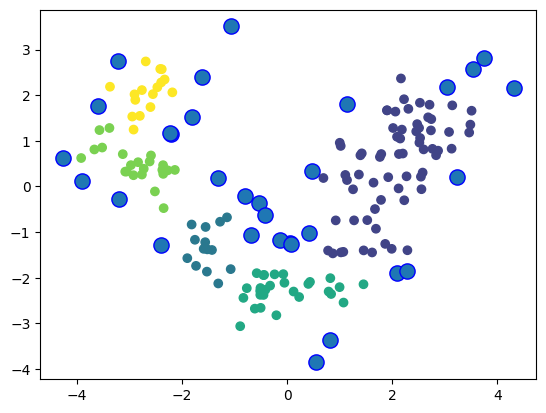

In [142]:
# plotting the scatter plot
plt.scatter(x_transformed[:,0], x_transformed[:,1], c=dbscan_labels)
plt.scatter(x_transformed[index_outliers_dbscan,0], x_transformed[index_outliers_dbscan,1], edgecolors='b', s=120)

In [143]:
# let's try one more method to find "Local Outliers" using - Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5)

In [144]:
lof_scores = lof.fit_predict(x_transformed)
lof_negative_score = lof.negative_outlier_factor_
lof_outliers = x_transformed[lof_scores==-1]
outliers_index_lof = np.where(lof_scores==-1)
outliers_index_lof

(array([ 13,  15,  44,  49,  58,  79, 114, 115, 133, 143, 157, 158, 169,
        176]),)

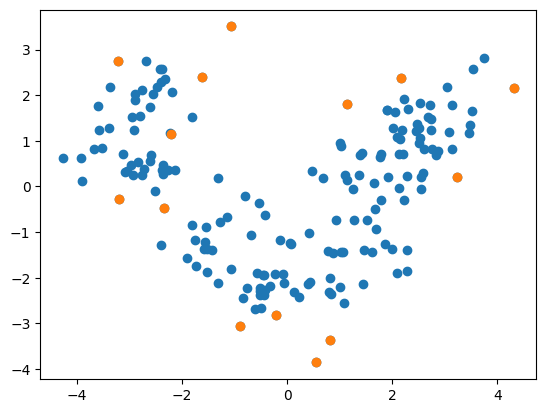

In [145]:
# plotting the scatter plot
plt.scatter(x_transformed[:,0], x_transformed[:,1])
plt.scatter(x_transformed[outliers_index_lof,0], x_transformed[outliers_index_lof,1])